In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, KBinsDiscretizer
from sklearn.metrics import confusion_matrix

# Customer Churn Dataset

In [3]:
df = pd.read_csv('./data/cust_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [376]:
print(f'There are {df.shape} data in the dataset initially')

There are (7043, 21) data in the dataset initially


In [237]:
# checking to see the number of null values in the dataframe
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [238]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [377]:
# drop the missing labels in the dataset
print(len(df))

df.dropna(axis=0, subset=['Churn'])

print(len(df))

7043
7043


In [378]:
# drop the customer ID column in the dataset
df.drop('customerID', axis=1, inplace=True)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [379]:
# converting the labels(y) to numeric labels
label_encoder = preprocessing.LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [380]:
print("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


In [8]:
# checking to see if there is any white space in any of the columns, if so convert them to null value
def get_whitespace_count(df):
    columns = df.columns
    dict = {}
    for col in columns:
        dict[col] = df[col].str.isspace().sum() if df[col].dtype == 'object' else -1

    print(dict)

In [382]:
df = df.replace(r'^\s*$', np.NaN, regex=True)
get_whitespace_count(df)

{'gender': 0, 'SeniorCitizen': -1, 'Partner': 0, 'Dependents': 0, 'tenure': -1, 'PhoneService': 0, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 0, 'PaymentMethod': 0, 'MonthlyCharges': -1, 'TotalCharges': 0, 'Churn': -1}


In [383]:
print("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   11


In [384]:
print("\nMissing values :  ", df.isnull().sum())


Missing values :   gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [385]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast="float")

In [386]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                 int64
dtype: object

In [387]:
df['TotalCharges'].fillna(value=df['TotalCharges'].mean(), inplace=True)

In [388]:
print("\nMissing values :  ", df.isnull().sum())


Missing values :   gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [389]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## So there is class imbalance in the dataset

# Converting non numerical values to one hot encoded values

In [390]:
# first we separate the numerical and categorical features
num_cols = df._get_numeric_data().columns
columns = df.columns
categorical_cols = list(set(columns) - set(num_cols))

In [391]:
print(categorical_cols)
print(num_cols)

['OnlineBackup', 'DeviceProtection', 'OnlineSecurity', 'Contract', 'PhoneService', 'StreamingTV', 'Dependents', 'StreamingMovies', 'PaymentMethod', 'InternetService', 'TechSupport', 'PaperlessBilling', 'gender', 'MultipleLines', 'Partner']
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')


In [392]:
cat_df = df.copy()
cat_df = cat_df.select_dtypes(include=['object'])
cat_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [393]:
cat_df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [394]:
test = pd.get_dummies(cat_df, columns=categorical_cols).head()

test.columns

Index(['OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PhoneService_No', 'PhoneService_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'Dependents_No', 'Dependents_Yes', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'PaperlessBilling_No', 'PaperlessBilling_Yes', 'ge

In [395]:
numerical_df = df.select_dtypes(exclude=['object'])
numerical_df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [396]:
numerical_df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [397]:
numerical_df['TotalCharges'].value_counts()

2283.300537    11
20.200001      11
19.750000       9
20.049999       8
19.900000       8
               ..
6849.399902     1
692.349976      1
130.149994      1
3211.899902     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [398]:
numerical_df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [399]:
numerical_df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [400]:
# The real conversion of catgorical to numerical
df = pd.get_dummies(df, columns=categorical_cols)

In [401]:
df.shape

(7043, 46)

In [266]:
test_df_1 = df.copy()

df.shape == test_df_1.sha

True

In [267]:
test_df_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,...,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Partner_No,Partner_Yes
0,0,1,29.85,29.850000,0,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
1,0,34,56.95,1889.500000,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
2,0,2,53.85,108.150002,1,0,0,1,1,0,...,0,0,1,0,1,1,0,0,1,0
3,0,45,42.30,1840.750000,0,1,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
4,0,2,70.70,151.649994,1,1,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0


In [268]:
num_cols_bin_cands = list(num_cols)
num_cols_bin_cands.remove('SeniorCitizen')
num_cols_bin_cands.remove('Churn')
print(num_cols_bin_cands)

for col in num_cols_bin_cands:
    print(col)
    est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
    test_df_1[col] = est.fit_transform(test_df_1[[col]])

['tenure', 'MonthlyCharges', 'TotalCharges']
tenure
MonthlyCharges
TotalCharges


In [269]:
test_df_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,...,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Partner_No,Partner_Yes
0,0,0.0,0.0,0.0,0,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
1,0,1.0,1.0,0.0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
2,0,0.0,1.0,0.0,1,0,0,1,1,0,...,0,0,1,0,1,1,0,0,1,0
3,0,1.0,0.0,0.0,0,1,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
4,0,0.0,1.0,0.0,1,1,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0


In [270]:
y = test_df_1['Churn']
X = test_df_1.drop('Churn', axis=1)

In [275]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,...,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Partner_No,Partner_Yes
0,0,0.0,0.0,0.0,0,0,1,1,0,0,...,0,0,1,1,0,0,1,0,0,1
1,0,1.0,1.0,0.0,1,0,0,0,0,1,...,0,1,0,0,1,1,0,0,1,0
2,0,0.0,1.0,0.0,0,0,1,1,0,0,...,0,0,1,0,1,1,0,0,1,0
3,0,1.0,0.0,0.0,1,0,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,0,0.0,1.0,0.0,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0


In [273]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8019872249822569

In [276]:
## Without binning the continous vars

In [277]:
test_df_2 = df.copy()

In [279]:
test_df_2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,...,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Partner_No,Partner_Yes
0,0,1,29.85,29.850000,0,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
1,0,34,56.95,1889.500000,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
2,0,2,53.85,108.150002,1,0,0,1,1,0,...,0,0,1,0,1,1,0,0,1,0
3,0,45,42.30,1840.750000,0,1,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
4,0,2,70.70,151.649994,1,1,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0


In [281]:
y = test_df_2['Churn']
X = test_df_2.drop('Churn', axis=1)

assert X.shape[0] == y.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

/home/akil/anaconda3/envs/ai/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.815471965933286

In [287]:
# scaling the full dataset
X_scaler = StandardScaler().fit_transform(X)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8119233498935415

In [290]:
num_cols_bin_cands

['tenure', 'MonthlyCharges', 'TotalCharges']

In [291]:
# scaling only numerical cols
test_df_3 = df.copy()

for col in num_cols_bin_cands:
    test_df_3[col] = StandardScaler().fit_transform(test_df_3[[col]])

In [292]:
test_df_3.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,...,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Partner_No,Partner_Yes
0,0,-1.277445,-1.160323,-0.994971,0,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
1,0,0.066327,-0.259629,-0.173876,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
2,0,-1.236724,-0.362660,-0.960399,1,0,0,1,1,0,...,0,0,1,0,1,1,0,0,1,0
3,0,0.514251,-0.746535,-0.195400,0,1,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
4,0,-1.236724,0.197365,-0.941193,1,1,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0


In [293]:
y = test_df_3['Churn']
X = test_df_3.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8119233498935415

In [298]:
# lets try with minmaxscaler

# scaling only numerical cols
test_df_4 = df.copy()

for col in num_cols_bin_cands:
    test_df_4[col] = MinMaxScaler().fit_transform(test_df_4[[col]])


test_df_4.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,...,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Partner_No,Partner_Yes
0,0,0.013889,0.115423,0.001275,0,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
1,0,0.472222,0.385075,0.215867,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
2,0,0.027778,0.354229,0.010310,1,0,0,1,1,0,...,0,0,1,0,1,1,0,0,1,0
3,0,0.625000,0.239303,0.210241,0,1,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
4,0,0.027778,0.521891,0.015330,1,1,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0


In [299]:
y = test_df_4['Churn']
X = test_df_4.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

/home/akil/anaconda3/envs/ai/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8112136266855926

In [373]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes', 'Dependents_No',
       'Dependents_Yes', 'InternetService_DSL',
       ...
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'PaperlessBilling_No', 'PaperlessBilling_Yes', 'gender_Female',
       'gender_Male'],
      dtype='object', length=6576)

In [8]:
def preprocess_churn_data(df, label):

    # # then we see information about dataset
    print(df.info())

    #print(df.dtypes)

    # drop the missing labels in the dataset
    print(len(df))

    df.dropna(axis=0, subset=[label])

    print(len(df))

    # drop the customer ID column in the dataset
    df.drop('customerID', axis=1, inplace=True)

    # converting the labels(y) to numeric labels
    print(df.head())
    label_encoder = preprocessing.LabelEncoder()
    df[label] = label_encoder.fit_transform(df[label])
    print(df.head())

    print("\nMissing values :  ", df.isnull().sum().values.sum())

    # get the whitespace  counts and remove them
    get_whitespace_count(df)

    df = df.replace(r'^\s*$', np.NaN, regex=True)

    get_whitespace_count(df)

    print("\nMissing values :  ", df.isnull().sum())

    # converting a single column to float
    # df[cols] = df[cols].apply(pd.to_numeric, errors='coerce') where cols are required columns we want to convert
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast="float", errors='coerce')

    #print("\nBefore Missing values :  ", df.isnull().sum())

    # replacing the missing values with mean for total charges
    df['TotalCharges'].fillna(value=df['TotalCharges'].mean(), inplace=True)


    # first we separate the numerical and categorical features
    num_cols = df._get_numeric_data().columns
    columns = df.columns
    categorical_cols = list(set(columns) - set(num_cols))

    print('Numerical Cols: ', num_cols)
    print('All cols:', columns)
    print('categorical_cols:', categorical_cols)

    #print("\After Handling Missing values :  ", df.isnull().sum())

    # converting from categorical features to numerical features
    df = pd.get_dummies(df, columns=categorical_cols)

    num_cols_bin_cands = list(num_cols)
    num_cols_bin_cands.remove('SeniorCitizen')
    num_cols_bin_cands.remove('Churn')
    print(num_cols)

    for col in num_cols_bin_cands:
        print(col)
        df[col] = StandardScaler().fit_transform(df[[col]])


    # changing the lables from 0,1 to -1,1
    df[label] = df[label].replace([0],-1)

    df.reset_index(inplace = True, drop = True)

    return df
    

In [9]:
df = pd.read_csv('./data/cust_churn.csv')

df = preprocess_churn_data(df, 'Churn')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,...,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,PaperlessBilling_No,PaperlessBilling_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,PhoneService_No,PhoneService_Yes
0,0,-1.277445,-1.160323,-0.994971,-1,1,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
1,0,0.066327,-0.259629,-0.173876,-1,0,1,1,0,0,...,0,0,1,1,0,1,0,0,0,1
2,0,-1.236724,-0.362660,-0.960399,1,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
3,0,0.514251,-0.746535,-0.195400,-1,0,1,1,0,0,...,0,0,1,1,0,0,0,1,1,0
4,0,-1.236724,0.197365,-0.941193,1,1,0,1,0,0,...,1,0,0,0,1,1,0,0,0,1


In [61]:
df['Churn'] = df['Churn'].replace([0],-1)

In [62]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,gender_Female,gender_Male,...,InternetService_Fiber optic,InternetService_No,PhoneService_No,PhoneService_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,0,-1.277445,-1.160323,-0.994971,-1,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0.066327,-0.259629,-0.173876,-1,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.960399,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
3,0,0.514251,-0.746535,-0.195400,-1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
4,0,-1.236724,0.197365,-0.941193,1,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


# Adult income dataset

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train_df = pd.read_csv('./data/adult-dataset/adult.data', names=columns, header=None, sep=", ", engine='python')
test_df = pd.read_csv('./data/adult-dataset/adult.test',  names=columns, header=None, sep=", ", engine='python')

test_df['income'].replace(regex=True, to_replace=r'\.', value='', inplace=True)
test_df.drop([0], inplace=True)
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [3]:
df = pd.concat([train_df, test_df])
df.reset_index(inplace = True, drop = True)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  object 
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.6+ MB
None


In [5]:
# replacing all '?' with Nan
df.replace('?', np.nan, inplace=True)

In [6]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [7]:
# removing Nan from labels
df.dropna(axis=0, subset=['income'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
48838,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
48839,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
48840,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [8]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [9]:
# converting the labels(y) to numeric labels
label_encoder = preprocessing.LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])

df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0
5,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,0
6,49,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,0
7,52,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,1
8,31,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,1
9,42,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,1


In [10]:
df.dtypes

age                object
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
income              int64
dtype: object

In [13]:
get_whitespace_count(df)

{'age': 0, 'workclass': 0, 'fnlwgt': -1, 'education': 0, 'education-num': -1, 'marital-status': 0, 'occupation': 0, 'relationship': 0, 'race': 0, 'sex': 0, 'capital-gain': -1, 'capital-loss': -1, 'hours-per-week': -1, 'native-country': 0, 'income': -1}


### converting 'age' column to numerical value

In [14]:
df['age'] = pd.to_numeric(df['age'], downcast="int", errors='coerce')

### replacing categorical missing values with the most frequent data

In [15]:
test = df.copy()

test['native-country'].fillna(value=test['native-country'].mode()[0], inplace=True)

In [16]:
columns = list(df.columns)
columns_with_nan = df.columns[df.isna().any()].tolist()
num_cols = list(df._get_numeric_data().columns)
cat_cols = list(set(columns) - set(num_cols))

In [17]:
cat_cols_with_nan = set(columns_with_nan) - set(num_cols)
num_cols_with_nan = set(columns_with_nan) - set(cat_cols)

In [535]:
def get_all_cols(df):
    columns = list(df.columns)
    columns_with_nan = df.columns[df.isna().any()].tolist()
    num_cols = list(df._get_numeric_data().columns)
    cat_cols = list(set(columns) - set(num_cols))
    cat_cols_with_nan = set(columns_with_nan) - set(num_cols)
    num_cols_with_nan = set(columns_with_nan) - set(cat_cols)
    binary_cols = get_binary_col_count(df, columns)

    return columns, columns_with_nan, num_cols, cat_cols, cat_cols_with_nan, num_cols_with_nan, binary_cols

In [536]:
def get_binary_col_count(df, columns):
    return [ col for col in columns if len(df[col].value_counts()) == 2]

In [18]:
for cat_col in cat_cols_with_nan:
    df[cat_col].fillna(value=df[cat_col].mode()[0], inplace=True)

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Replacing numerical null cols with mean

In [19]:
for num_col in num_cols_with_nan:
    df[num_col].fillna(value=df[num_col].mean(), inplace=True)

In [20]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Converting categorical columns to one hot encoded columns

In [22]:
df.shape

df = pd.get_dummies(df, columns=cat_cols)

df.shape

(48842, 106)

In [23]:
df.columns.tolist()

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income',
 'race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'native-country_Cambodia',
 'native-country_Canada',
 'native-country_China',
 'native-country_Columbia',
 'native-country_Cuba',
 'native-country_Dominican-Republic',
 'native-country_Ecuador',
 'native-country_El-Salvador',
 'native-country_England',
 'native-country_France',
 'native-country_Germany',
 'native-country_Greece',
 'native-country_Guatemala',
 'native-country_Haiti',
 'native-country_Holand-Netherlands',
 'native-country_Honduras',
 'native-country_Hong',
 'native-country_Hungary',
 'native-country_India',
 'native-country_Iran',
 'native-country_Ireland',
 'native-country_Italy',
 'native-country_Jamaica',
 'native-country_Japan',
 'native-country_Laos',
 'native-country_Mexico',
 'native-country_Nicaragua',
 'native-country_Outlying-US(Guam-USVI-etc)',
 'native-country

### Experiment to see whether scaling/ min_max_normalization / binning works for continous data or not

In [39]:
def logr( df, label, max_iter = 100):
    y = df[label]
    X = df.drop(label, axis=1)

    assert X.shape[0] == y.shape[0]

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
    clf = LogisticRegression(random_state=0, max_iter=max_iter).fit(X_train, y_train)
    print(clf.score(X_test, y_test))

In [27]:
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income']

In [28]:
df[num_cols].head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0


In [50]:
transformable_columns = [
    'age',
    'fnlwgt',
    'education-num',
    'capital-loss',
    'hours-per-week'
]

In [481]:
def get_value_counts(df, num_cols):
    for col in num_cols:
        print(df[col].value_counts())

In [11]:
def transformStandardScaler(df, transformable_columns, label):
    test = df.copy()

    if label in transformable_columns:
        transformable_columns.remove(label)

    test[transformable_columns] = StandardScaler().fit_transform(test[transformable_columns])

    return test

In [12]:
def minMaxScaler(df, transformable_columns, label):
    test = df.copy()

    if label in transformable_columns:
        transformable_columns.remove(label)

    for col in transformable_columns:
        test[col] = MinMaxScaler().fit_transform(test[[col]])

    return test

In [13]:
def transformKBinsDiscretizer(df, transformable_columns, label, bins):

    test = df.copy()

    if label in transformable_columns:
        transformable_columns.remove(label)

    for col in transformable_columns:
        est = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
        test[col] = est.fit_transform(test[[col]])

    return test

In [44]:
test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0.025996,-1.061979,1.136512,2174.0,-0.217127,-0.034087,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.828308,-1.007104,1.136512,0.0,-0.217127,-2.213032,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.046942,0.246034,-0.419335,0.0,-0.217127,-0.034087,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.047121,0.426663,-1.197259,0.0,-0.217127,-0.034087,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.776316,1.408530,1.136512,0.0,-0.217127,-0.034087,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [138]:
logr(test, 'income', 1000)

NameError: name 'test' is not defined

### Scaling all the values

In [66]:
test = standardScaler(df, df.columns.tolist(), 'income')

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week
race_Amer-Indian-Eskimo
race_Asian-Pac-Islander
race_Black
race_Other
race_White
native-country_Cambodia
native-country_Canada
native-country_China
native-country_Columbia
native-country_Cuba
native-country_Dominican-Republic
native-country_Ecuador
native-country_El-Salvador
native-country_England
native-country_France
native-country_Germany
native-country_Greece
native-country_Guatemala
native-country_Haiti
native-country_Holand-Netherlands
native-country_Honduras
native-country_Hong
native-country_Hungary
native-country_India
native-country_Iran
native-country_Ireland
native-country_Italy
native-country_Jamaica
native-country_Japan
native-country_Laos
native-country_Mexico
native-country_Nicaragua
native-country_Outlying-US(Guam-USVI-etc)
native-country_Peru
native-country_Philippines
native-country_Poland
native-country_Portugal
native-country_Puerto-Rico
native-country_Scotland
native-country_South
native-country_Tai

In [ ]:
test['income'].head(20)

In [69]:
logr(test, 'income')

0.8511618384686253


In [74]:
get_value_counts(df, num_cols)

36.0    1348
35.0    1337
33.0    1335
23.0    1329
31.0    1325
        ... 
88.0       6
85.0       5
87.0       3
89.0       2
86.0       1
Name: age, Length: 74, dtype: int64
203488.0    21
120277.0    19
190290.0    19
125892.0    18
126569.0    18
            ..
286983.0     1
185942.0     1
234220.0     1
214706.0     1
350977.0     1
Name: fnlwgt, Length: 28523, dtype: int64
9.0     15784
10.0    10878
13.0     8025
14.0     2657
11.0     2061
7.0      1812
12.0     1601
6.0      1389
4.0       955
15.0      834
5.0       756
8.0       657
16.0      594
3.0       509
2.0       247
1.0        83
Name: education-num, dtype: int64
0.0        44807
15024.0      513
7688.0       410
7298.0       364
99999.0      244
           ...  
22040.0        1
2387.0         1
1639.0         1
1111.0         1
6612.0         1
Name: capital-gain, Length: 123, dtype: int64
0.0       46560
1902.0      304
1977.0      253
1887.0      233
2415.0       72
          ...  
1539.0        1
1870.0     

### Binning

In [75]:
test = df.copy()

kBinsDiscretizer(test, transformable_columns, 'income', 5)

In [76]:
test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,1.0,0.0,4.0,2174.0,0.0,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2.0,0.0,4.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,0.0,2.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2.0,0.0,2.0,0.0,0.0,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,4.0,0.0,0.0,1.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [78]:
logr(test, 'income', max_iter=1000)

0.8517760262053434


## Credit Card Fraud Dataset

In [100]:
df = pd.read_csv('./data/creditcard.csv')

df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [101]:
df['Class'].unique()

array([0, 1])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [103]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [104]:
get_whitespace_count(df)

{'Time': -1, 'V1': -1, 'V2': -1, 'V3': -1, 'V4': -1, 'V5': -1, 'V6': -1, 'V7': -1, 'V8': -1, 'V9': -1, 'V10': -1, 'V11': -1, 'V12': -1, 'V13': -1, 'V14': -1, 'V15': -1, 'V16': -1, 'V17': -1, 'V18': -1, 'V19': -1, 'V20': -1, 'V21': -1, 'V22': -1, 'V23': -1, 'V24': -1, 'V25': -1, 'V26': -1, 'V27': -1, 'V28': -1, 'Amount': -1, 'Class': -1}


In [105]:
df.replace('?', np.nan, inplace=True)

In [107]:
columns, columns_with_nan, num_cols, cat_cols, cat_cols_with_nan, num_cols_with_nan = get_all_cols(df)

In [106]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [96]:
df = standardScaler(df, df.columns.tolist(), 'Class')

In [97]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [98]:
logr(df, 'Class')

0.9991397773954567


In [115]:
logr(df, 'Class', max_iter=1000)

0.9991573329588147


In [120]:
number_records_fraud = df['Class'].value_counts()[1]

In [125]:
normal_indices = df[df['Class'] == 0].index
fraud_indices = df[df['Class'] == 1].index

# sanity check
len(normal_indices.tolist() + fraud_indices.tolist()) == len(df)

True

In [128]:
random_normal_indices  = np.random.choice(normal_indices, 50000, replace=False)

random_normal_sample_df = df.iloc[random_normal_indices, :]
random_normal_sample_df.shape

fraud_df = df.iloc[fraud_indices, :]

fraud_df.shape

(50000, 31)

In [130]:
fraud_df = df.iloc[fraud_indices, :]

fraud_df.shape

(492, 31)

In [138]:
final_df = pd.concat([random_normal_sample_df, fraud_df])

final_df.reset_index(inplace=True, drop=True)

final_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,165344.0,-0.008985,-1.108196,-2.196696,-1.363001,2.616741,-3.123302,-2.420816,-3.437688,-1.384024,...,-0.416936,1.636937,-4.544892,0.415068,-1.172873,-0.190015,0.390432,0.604457,300.00,0
1,79514.0,-0.995924,0.549902,1.028963,0.049241,0.527071,-1.082926,0.850455,-0.151322,-0.836747,...,0.099905,0.425952,0.198018,0.582617,-0.221981,0.238016,0.231366,0.215337,33.45,0
2,121797.0,2.091029,-0.110285,-1.465884,0.058664,0.433457,-0.299445,0.077427,-0.137061,0.313275,...,-0.301572,-0.753699,0.198529,-1.030078,-0.183908,0.240829,-0.074264,-0.079877,1.98,0
3,127071.0,2.022734,-0.495837,-0.647778,0.276017,-0.327241,0.014069,-0.607562,-0.041588,1.236783,...,0.168900,0.718421,-0.026850,-0.915162,-0.076403,0.685303,-0.019698,-0.053246,29.99,0
4,165031.0,0.767248,-3.324110,-2.092052,-0.085670,-1.230204,-0.063705,0.326442,-0.349020,0.089902,...,0.896675,1.211248,-0.783445,0.758383,0.225596,0.191203,-0.155328,0.063090,752.39,0


## Preprocess Churn Data

In [551]:
def preprocess_churn_data(df, label):

    # # then we see information about dataset
    print(df.info())

    #print(df.dtypes)

    # drop the missing labels in the dataset
    print(len(df))

    df.dropna(axis=0, subset=[label])

    print(len(df))

    # drop the customer ID column in the dataset
    df.drop('customerID', axis=1, inplace=True)

    # converting the labels(y) to numeric labels
    print(df.head())
    label_encoder = preprocessing.LabelEncoder()
    df[label] = label_encoder.fit_transform(df[label])
    print(df.head())

    print("\nMissing values :  ", df.isnull().sum().values.sum())

    # get the whitespace  counts and remove them
    get_whitespace_count(df)

    df = df.replace(r'^\s*$', np.NaN, regex=True)

    get_whitespace_count(df)

    print("\nMissing values :  ", df.isnull().sum())

    # converting a single column to float
    # df[cols] = df[cols].apply(pd.to_numeric, errors='coerce') where cols are required columns we want to convert
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast="float", errors='coerce')

    #print("\nBefore Missing values :  ", df.isnull().sum())

    # get all columns
    columns, columns_with_nan, num_cols, cat_cols, cat_cols_with_nan, num_cols_with_nan, binary_cols = get_all_cols(df)

    # removing categorical columns with mode( most frequent value)
    for cat_col in cat_cols_with_nan:
        df[cat_col].fillna(value=df[cat_col].mode()[0], inplace=True)

    print(df.isnull().sum())

    # removing numerical columns with mean value
    for num_col in num_cols_with_nan:
        df[num_col].fillna(value=df[num_col].mean(), inplace=True)

    print(df.isnull().sum())

    # one hot encoding the categorical cols
    df = pd.get_dummies(df, columns=list(set(cat_cols) - set(binary_cols)))

    # label encoding the binary cols
    for col in list(set(binary_cols) - set(label)):
        print('Label Encoding: ', col)
        label_encoder = preprocessing.LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

    # # replacing the missing values with mean for total charges
    # df['TotalCharges'].fillna(value=df['TotalCharges'].mean(), inplace=True)
    #
    #
    # # first we separate the numerical and categorical features
    # num_cols = df._get_numeric_data().columns
    # columns = df.columns
    # categorical_cols = list(set(columns) - set(num_cols))
    #
    # # print('Numerical Cols: ', num_cols)
    # # print('All cols:', columns)
    # # print('categorical_cols:', categorical_cols)
    #
    # #print("\After Handling Missing values :  ", df.isnull().sum())
    #
    # # converting from categorical features to numerical features
    # df = pd.get_dummies(df, columns=categorical_cols)
    #
    # num_cols_bin_cands = list(num_cols)
    # num_cols_bin_cands.remove('SeniorCitizen')
    # num_cols_bin_cands.remove('Churn')
    # print('lool', num_cols_bin_cands)
    #
    # for col in num_cols_bin_cands:
    #     print('The column is: ', col)
    #     df[col] = df[col].replace(StandardScaler().fit_transform(df[[col]]))

    df = transformStandardScaler(df, list(set(num_cols) - set(binary_cols)), label)


    # changing the lables from 0,1 to -1,1
    df[label] = df[label].replace([0],-1)

    df.reset_index(inplace = True, drop = True)

    return df


## Preprocess Adult Dataset

In [539]:
def preprocess_adult_data(df, label, is_test, binning):

    if is_test:
        test_df['income'].replace(regex=True, to_replace=r'\.', value='', inplace=True)
        test_df.drop([0], inplace=True)

    # reset Index
    df.reset_index(inplace = True, drop = True)

    #print info
    print(df.info())

    # replacing all the ? with Nan
    df.replace('?', np.nan, inplace=True)

    # get whitespace count
    get_whitespace_count(df)

    # checking ig there is null
    print(df.isnull().sum())

    # dropping native country
    df.drop('native-country', inplace=True, axis=1)
    # removing Nan from labels
    df.dropna(axis=0, subset=[label])

    print(df[label].unique())

    # converting the labels(y) to numeric labels
    label_encoder = preprocessing.LabelEncoder()
    df[label] = label_encoder.fit_transform(df['income'])

    print(df.head(20))

    print(df.dtypes)

    # convert age column to integer
    df['age'] = pd.to_numeric(df['age'], downcast="integer", errors='coerce')

    # get all columns
    columns, columns_with_nan, num_cols, cat_cols, cat_cols_with_nan, num_cols_with_nan, binary_cols = get_all_cols(df)

    # removing categorical columns with mode( most frequent value)
    for cat_col in cat_cols_with_nan:
        df[cat_col].fillna(value=df[cat_col].mode()[0], inplace=True)

    print(df.isnull().sum())

    # removing numerical columns with mean value
    for num_col in num_cols_with_nan:
        df[num_col].fillna(value=df[num_col].mean(), inplace=True)

    print(df.isnull().sum())

    # one hot encoding the categorical cols
    df = pd.get_dummies(df, columns=list(set(cat_cols) - set(binary_cols)))

    # label encoding the binary cols
    for col in list(set(binary_cols) - set(label)):
        label_encoder = preprocessing.LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])


    # standardize the numerical columns only
    transformable_columns = [
        'age',
        'fnlwgt',
        'education-num',
        'capital-loss',
        'hours-per-week'
    ]

    if binning:
        df = transformKBinsDiscretizer(df, transformable_columns, label, 10)
    else:
        df = transformStandardScaler(df, transformable_columns, label)

    # changing the scale
    df[label] = df[label].replace([0],-1)

    print(df.head())

    return df

## Preprocess credit card dataset

In [561]:
def preprocess_credit_card(df, label, binning, fract_neg_class):
    print(df.info())

    # reset Index
    df.reset_index(inplace = True, drop = True)

    #print info
    print(df.info())

    # replacing all the ? with Nan
    df.replace('?', np.nan, inplace=True)

    # get whitespace count
    get_whitespace_count(df)

    # checking ig there is null
    print(df.isnull().sum())

    # converting the labels(y) to numeric labels
    label_encoder = preprocessing.LabelEncoder()
    df[label] = label_encoder.fit_transform(df[label])

    print(df.head(20))

    print(df.dtypes)

    # get all columns
    columns, columns_with_nan, num_cols, cat_cols, cat_cols_with_nan, num_cols_with_nan, binary_cols = get_all_cols(df)

    # removing categorical columns with mode( most frequent value)
    for cat_col in cat_cols_with_nan:
        df[cat_col].fillna(value=df[cat_col].mode()[0], inplace=True)

    print(df.isnull().sum())

    # removing numerical columns with mean value
    for num_col in num_cols_with_nan:
        df[num_col].fillna(value=df[num_col].mean(), inplace=True)

    print(df.isnull().sum())

    # one hot encoding the categorical cols
    df = pd.get_dummies(df, columns=list(set(cat_cols) - set(binary_cols)))

    # label encoding the binary cols
    for col in list(set(binary_cols) - set(label)):
        label_encoder = preprocessing.LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

    if binning:
        df = transformKBinsDiscretizer(df, columns, label, 10)
    else:
        df = transformStandardScaler(df, columns, label)


    # changing the scale
    df[label] = df[label].replace([0],-1)

    # choosing all positive class and less negative classes
    normal_indices = df[df[label] == -1].index
    fraud_indices = df[df[label] == 1].index

    print('Length of normal_indices', len(normal_indices))
    print('Length of fraud indices', len(fraud_indices))

    # sanity check
    assert len(normal_indices.tolist() + fraud_indices.tolist()) == len(df)

    #random_normal_indices  = np.random.choice(normal_indices, fract_neg_class * len(fraud_indices), replace=False)
    random_normal_indices  = np.random.choice(normal_indices, 20000, replace=False)
    random_normal_sample_df = df.iloc[random_normal_indices, :]

    fraud_df = df.iloc[fraud_indices, :]

    final_df = pd.concat([random_normal_sample_df, fraud_df])

    final_df.reset_index(inplace=True, drop=True)

    print(final_df.head(2))
    print(final_df.shape)

    return final_df

## Confusion Metric Class

In [468]:
class MetricCalculator:
    def __init__(self, y_real, y_pred) -> None:
        self.TP = 0
        self.TN = 0
        self.FP = 0
        self.FN = 0
        self.y_real = y_real
        self.y_pred = y_pred
        self.num_rows = len(y_pred)

    def calculate_cf_matrix_fields(self):

        self.y_real[self.y_real == 0] = -1

        for index in range(self.num_rows):
            if self.y_real[index] == 1 and self.y_pred[index] == 1:
                self.TP += 1
            if self.y_pred[index] == 1 and self.y_real[index] == -1:
                self.FP += 1
            if self.y_real[index] == -1 and self.y_pred[index] == -1:
                self.TN += 1
            if self.y_pred[index] == -1 and self.y_real[index] == 1:
                self.FN += 1


    def get_cf_field(self):
        return self.TP, self.TN, self.FP, self.FN

    def calculate_all_metric(self):
        self.calculate_cf_matrix_fields()
        self.calculate_accuracy()
        self.calculate_recall()
        self.calculate_specificity()
        self.calculate_precision()
        self.calculate_false_discovery_rate()
        self.calculate_f1_score()

        print(f'TP: {self.TP}')
        print(f'TN: {self.TN}')
        print(f'FP: {self.FP}')
        print(f'FN: {self.FN}')

        print(f'Accuracy: {self.calculate_accuracy()}')
        print(f'Recall: {self.calculate_recall()}')
        print(f'Specificity: {self.calculate_specificity()}')
        print(f'Precision: {self.calculate_precision()}')
        print(f'False Discovery Rate: {self.calculate_false_discovery_rate()}')
        print(f'F1 score: {self.calculate_f1_score()}')



    def calculate_accuracy(self):
        return (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)

    def calculate_precision(self):
        return self.TP / (self.TP + self.FP)

    def calculate_recall(self):
        return self.TP / (self.TP + self.FN)

    def calculate_specificity(self):
        return self.TN / (self.TN + self.FP)

    def calculate_false_discovery_rate(self):
        return self.FP / (self.FP + self.TP)

    def calculate_f1_score(self):
        return (2*self.TP) / (2*self.TP + self.FP + self.FN)

## Logistic Regression Class

In [470]:
class LogisticRegression:
    def __init__(self, learning_rate, max_iter, test_size, early_stop_error, decay) -> None:
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.cost_history = []
        self.learning_rate_history = []
        self.x_train = None
        self.x_test = None
        self.y_train = None
        self.y_test = None
        self.test_size = test_size
        self.label = None
        self.early_stop_error = early_stop_error
        self.decay = decay

    def split_given_train_test_df(self, train_df, test_df, label):
        self.label = label

        y_train = train_df[label]
        x_train = train_df.drop(label, axis=1)

        self.y_train = np.array(y_train).reshape(y_train.shape[0], 1)
        self.x_train = np.array(x_train)

        y_test = test_df[label]
        x_test = test_df.drop(label, axis=1)

        self.y_test = np.array(y_test).reshape(y_test.shape[0], 1)
        self.x_test = np.array(x_test)


    def split_dataset(self, df, label):

        self.label = label
        y = df[label]
        X = df.drop(label, axis=1)

        y = np.array(y).reshape(y.shape[0], 1)
        X = np.array(X)

        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X,y,test_size=self.test_size,random_state=111)

    # def fit_sigmoid(self):
    #     df[label] = df[label].replace([-1],0)
    #     X = df.drop(label, axis=1)
    #     y = df[label]
    #
    #     n_samples, n_features = X.shape
    #
    #     # first we convert them to numpy arrays
    #     y = np.array(y).reshape(y.shape[0], 1)
    #     X = np.array(X)
    #     m = y.shape[0] # m indicates number of rows
    #
    #     assert X.shape[0] == y.shape[0]
    #
    #     # initializing weights as zeros
    #     self.weights = np.zeros(n_features).reshape(n_features, 1)
    #
    #     # initializing cost history
    #     self.cost_history = np.zeros((self.max_iter, 1))
    #
    #     for epoch in range(self.max_iter):
    #         #print(X.shape, self.weights.shape)
    #         h_w = self.sigmoid(np.matmul(X, self.weights))
    #         X_T = np.transpose(X)
    #         y_h_w = y - h_w
    #
    #         #dw = (2 * self.learning_rate) * (1/m) * np.matmul(X_T, np.multiply(np.multiply(y_h_w, h_w), 1-h_w))
    #         dw = (1 / n_samples) * np.dot(X_T, (h_w - y))
    #
    #         self.weights = self.weights + dw
    #         self.cost_history[epoch] = self.calculate_mse_cost(y_h_w)
    #
    #
    #     self.plot_cost_vs_iteration()
    #
    # def sigmoid(self, x):
    #     return 1 / (1 + np.exp(-x))

    def fit(self, is_constant_lr, no_curve, calculate_metric_on_train):
        #df[label] = df[label].replace([-1],0)
        n_samples, n_features = self.x_train.shape

        # initializing weights as zeros
        self.weights = np.zeros((n_features, 1))

        # initializing cost history
        self.cost_history = np.zeros((self.max_iter, 1))
        self.learning_rate_history = np.zeros((self.max_iter, 1))

        for epoch in range(self.max_iter):
            #print(X.shape, self.weights.shape)
            #print('Epoch: ', epoch)

            if not is_constant_lr:
                # adjusting learning rate in each epoch
                self.learning_rate_scheduler(epoch)
                self.learning_rate_history[epoch] = self.learning_rate

            h_w = np.tanh(np.matmul(self.x_train, self.weights))
            X_T = np.transpose(self.x_train)
            y_h_w = self.y_train - h_w
            tan_der = 1 - np.square(h_w)

            self.weights = self.weights + (2 * self.learning_rate) * (1/n_samples) * np.matmul(X_T, np.multiply(y_h_w, tan_der))
            cost = self.calculate_mse_cost(y_h_w)
            self.cost_history[epoch] = cost

            if cost < self.early_stop_error:
                print('Stopping Training since the error is less than 0.5')
                break

        if not no_curve:
            self.plot_cost_vs_iteration()
            self.plot_learning_rate_curve()

        # calculate metrics on training set
        if calculate_metric_on_train:
            y_pred = lgr.predict(self.x_train)
            metric = MetricCalculator(self.y_train, y_pred)
            metric.calculate_all_metric()


    def predict(self, x):
        y_pred = np.tanh(x @ self.weights)

        y_pred[y_pred > 0]  = 1
        y_pred[y_pred <= 0] = -1

        return y_pred

    def generate_metric(self):
        y_pred = lgr.predict(self.x_test)
        metric = MetricCalculator(self.y_test, y_pred)
        metric.calculate_all_metric()

    @staticmethod
    def calculate_mse_cost(y_h_w):
        return np.mean(np.square(y_h_w))

    def plot_cost_vs_iteration(self):

        print(min(self.cost_history))
        plt.figure()
        plt.plot(range(self.max_iter), self.cost_history)
        plt.title('Cost Function Convergence Curve')
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost")
        plt.show()

    def plot_learning_rate_curve(self):
        plt.figure()
        plt.plot(range(self.max_iter), self.learning_rate_history)
        plt.title('Learning Rate Decay Curve')
        plt.xlabel("Number of Iterations")
        plt.ylabel("Learning Rate")
        plt.show()

    def calculate_information_gain(self, column_name):
        pass

    def learning_rate_scheduler(self, epoch):
        self.learning_rate *= (1. / (1. + self.decay * epoch))

## Testing on churn dataset

In [208]:
df = pd.read_csv('./data/cust_churn.csv')
df = preprocess_churn_data(df, 'Churn', False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [161]:
lgr = LogisticRegression(0.05, 0, 1000, 0.2, 0, 6e-6)
lgr.split_dataset(df, 'Churn')
lgr.fit(True)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


TypeError: can't multiply sequence by non-int of type 'float'

In [232]:
y_pred = lgr.predict()
y_test = lgr.y_test
metric = MetricCalculator(y_test, y_pred)
metric.calculate_all_metric()

Accuracy: 0.8090844570617459
Recall: 0.5718390804597702
Specificity: 0.8868991517436381
Precision: 0.6238244514106583
False Discovery Rate: 0.3761755485893417
F1 score: 0.5967016491754122


In [189]:
y_pred = lgr.predict()
y_test = lgr.y_test
metric = MetricCalculator(y_test, y_pred)
metric.calculate_all_metric()

Accuracy: 0.8097941802696949
Recall: 0.5747126436781609
Specificity: 0.8868991517436381
Precision: 0.625
False Discovery Rate: 0.375
F1 score: 0.5988023952095808


In [251]:
TP, TN, FP, FN = metric.get_cf_field()
print(TP)
print(TN)
print(TP + TN)
print(FP)
print(FN)

189
949
1138
112
159


## Testing on Adult Dataset

In [200]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train_df = pd.read_csv('./data/adult-dataset/adult.data', names=columns, header=None, sep=", ", engine='python')
test_df = pd.read_csv('./data/adult-dataset/adult.test',  names=columns, header=None, sep=", ", engine='python')

In [201]:
adult_train = preprocess_adult_data(train_df, 'income', False, False)
adult_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
{'age': -1, 'workclass': 0, 'fnlwgt': -1, 'education': 0, 'education-num': -1, 'marital-

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Female,sex_Male
0,0.030671,-1.063611,1.134739,2174,-0.21666,-0.035429,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.837109,-1.008707,1.134739,0,-0.21666,-2.222153,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.042642,0.245079,-0.420060,0,-0.21666,-0.035429,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.057047,0.425801,-1.197459,0,-0.21666,-0.035429,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,-0.775768,1.408176,1.134739,0,-0.21666,-0.035429,-1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


[0.50002061]


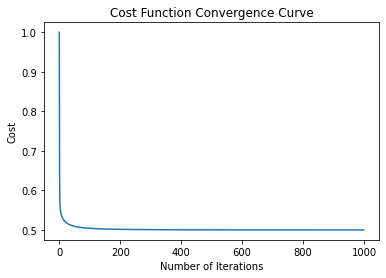

In [234]:
lgr = LogisticRegression(0.4, 0, 1000, 0.2, 0, 5e-6)
lgr.split_dataset(adult_train, 'income')
lgr.fit(True)

In [203]:
y_pred = lgr.predict()
y_test = lgr.y_test
metric = MetricCalculator(y_test, y_pred)
metric.calculate_all_metric()

Accuracy: 0.8283433133732535
Recall: 0.6321452589105582
Specificity: 0.8863907680063668
Precision: 0.6221045665122436
False Discovery Rate: 0.37789543348775645
F1 score: 0.6270847231487658


## Testing on Credit Card dataset

In [281]:
df = pd.read_csv('./data/creditcard.csv')

df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [282]:
df = preprocess_credit_card(df, 'Class', False, False)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.171687,0.914021,-0.147138,0.784650,2.938923,-0.597013,1.321964,-1.197013,0.506231,0.934547,...,0.096890,0.902463,0.349431,1.108053,-0.540311,0.117315,0.206525,-0.040296,-0.350191,-1
1,-0.396054,-0.418959,0.729288,0.774196,0.031542,0.080591,-0.747270,0.583799,-0.186895,-0.248099,...,-0.302803,-0.865229,0.184127,0.564503,-0.268994,0.075703,-0.389517,0.380269,-0.337757,-1
2,-0.502587,0.347871,-0.944369,0.254909,-0.852622,-1.057729,-0.232290,-0.338242,0.051788,1.588956,...,0.430760,0.621703,-0.660597,0.143173,0.719534,0.181039,-0.044151,0.182513,0.842198,-1
3,0.728123,-0.128395,0.231422,0.649041,-0.330581,-0.008945,-0.090208,0.139858,0.109524,0.365799,...,0.533339,1.571219,-0.159828,-0.561753,-1.726466,-0.649026,0.298704,0.731523,-0.252278,-1
4,-0.333913,0.733500,-0.724015,0.331430,-0.972509,-1.193516,-0.532204,-0.865010,-0.105060,-1.470664,...,-0.506640,-1.182913,0.163960,-0.061027,0.266458,-0.810336,0.072276,0.099732,-0.113344,-1


[0.32487502]


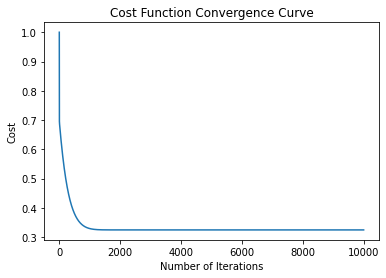

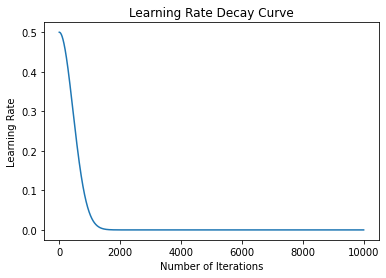

In [283]:
lgr = LogisticRegression(0.5, 0, 10000, 0.2, 0, 5e-6)
lgr.split_dataset(df, 'Class')
lgr.fit(False)

In [284]:
y_pred = lgr.predict()
y_test = lgr.y_test
metric = MetricCalculator(y_test, y_pred)
metric.calculate_all_metric()

Accuracy: 0.9712351945854484
Recall: 0.8910891089108911
Specificity: 0.9877551020408163
Precision: 0.9375
False Discovery Rate: 0.0625
F1 score: 0.9137055837563451


## Adaboost Class

In [460]:
class Adaboost:

    def __init__(self, num_of_learner, test_size):
        self.test_size = test_size
        self.y_test = None
        self.y_train = None
        self.x_test = None
        self.x_train = None
        self.num_of_learner = num_of_learner
        self.W = []
        self.h = []
        self.z = []
        self.label = None
        self.train_df = None
        self.test_df = None

    def split_dataset(self, df, label):
        self.label = label

        self.train_df, self.test_df = train_test_split(df,test_size = self.test_size ,random_state = 111)

    def split_dataset_given_tran_test(self, train_df, test_df, label):
        self.label = label
        self.train_df = train_df
        self.test_df = test_df


    def convert_df_to_np(self, df):
        y = df[self.label]
        X = df.drop(self.label, axis=1)

        y = np.array(y).reshape(y.shape[0], 1)
        X = np.array(X)

        return X,y

    def fit(self, base_learner_max_iter, error, learning_rate, decay):

        # setting the weights
        N = self.train_df.shape[0]
        self.W = [1.0/N]*N
        self.h = [None] * self.num_of_learner
        self.z = [None] * self.num_of_learner

        # keeping a copy of the original train dataframe
        original_train_df = self.train_df.copy()

        # getting numpy arrays for original train dataframe
        X_original_train_df, y_original_train_df = self.convert_df_to_np(original_train_df)

        for k in range(self.num_of_learner):
            print('Boosting Round: ', k)
            lgr_learner = LogisticRegression(learning_rate, base_learner_max_iter, 0.2, error, decay)

            resampled_df = original_train_df.sample(n=N, weights=self.W, replace=True)

            # convert resampled_df to fit to logistic regression
            X,y = self.convert_df_to_np(resampled_df)

            lgr_learner.x_train = X
            lgr_learner.y_train = y

            # train the weak learner
            lgr_learner.fit(is_constant_lr=True, no_curve=True, calculate_metric_on_train=False)

            # storing the weak learner
            self.h[k] = lgr_learner

            error = 0.0

            # getting the prediction of the weak learner for the original training data
            y_pred = self.h[k].predict(X_original_train_df)

            for i in range(N):
                if y_pred[i] != y_original_train_df[i]:
                    error += self.W[i]

            if error > 0.5:
                self.z[k] = 0
                continue

            for i in range(N):
                if y_pred[i] == y_original_train_df[i]:
                    self.W[i] = (self.W[i] * error) / (1.0 - error)

            # normalize data weights
            self.normalize_data_weights()

            if error == 0:
                self.z[k] = np.log2(float('inf'))
            else:
                self.z[k] = np.log2((1.0 - error) / error)

        # calculate metric for the training set and print
        self.weighted_sum(X_original_train_df, y_original_train_df)


    def predict(self):
        self.x_test, self.y_test = self.convert_df_to_np(self.test_df)
        self.weighted_sum(self.x_test, self.y_test)


    @staticmethod
    def majority_voting(preds):
        axis=1
        unique_vals, indices = np.unique(preds, return_inverse=True)
        return unique_vals[np.argmax(np.apply_along_axis(np.bincount, axis, indices.reshape(preds.shape),
                                                         None, np.max(indices) + 1), axis=axis)]

    def weighted_sum(self, x, y):

        preds = []
        for k in range(self.num_of_learner):
            weak_learner_weights = self.h[k].weights
            weak_learner_preds = np.tanh(x @ weak_learner_weights)
            weighted_preds = self.z[k] * weak_learner_preds
            preds.append(weighted_preds)

        preds = np.array(preds).squeeze().T
        print(preds.shape)

        weighted_sum_result = np.sum(preds, axis=1)
        weighted_sum_result[weighted_sum_result > 0]  = 1
        weighted_sum_result[weighted_sum_result <= 0] = -1

        metric = MetricCalculator(y, weighted_sum_result)
        metric.calculate_all_metric()


    def normalize_data_weights(self):
        total_data_weight = sum(self.W)
        W = [ (data_weight / total_data_weight )for data_weight in self.W]
        self.W = W

## Experiment on entropy calculation

In [623]:
df = pd.read_csv('./data/cust_churn.csv')

In [624]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [625]:
def calculate_entropy(q):
    return -1 * (q * np.log2(q) + (1-q) * np.log2(1-q)) if q > 0 else 0

In [626]:
def calculate_remainder(df, attribute, label):

    unique_vals, num_of_unique = np.unique(df[attribute], return_counts=True)

    remainder_sum = 0
    for index, attrib_val in enumerate(unique_vals):

        # choosing the rows equal to the unique value in the attribute
        filtered_df = df.where(df[attribute] == attrib_val).dropna()

        # calculating number of positive classed rows for the given attribute's unique value
        pk = len(filtered_df[filtered_df[label] == 1])
        nk = len(filtered_df[filtered_df[label] == 0])

        # sanity check
        assert nk == len(filtered_df) - pk

        prob = (pk + nk) / (len(df))
        attr_entropy = calculate_entropy(pk / (pk + nk))
        remainder_sum += prob * attr_entropy

    #print('Remainder sum is : ', remainder_sum)

    return  remainder_sum

In [637]:
def calculate_gain(df, label, attribute):

    if label != attribute:
        p = len(df[df[label] == 1])
        df_size = len(df) # p + n
        data_entropy = calculate_entropy(p/df_size)
        #print('Data entropy is', data_entropy)

        attribute_remainder = calculate_remainder(df, attribute, label)
        return data_entropy - attribute_remainder


In [628]:
def convert_cont_to_bins(df, old_col_name):
    min = df[old_col_name].min()
    median = df[old_col_name].median()

    if min != median:
        print(old_col_name)
        df[old_col_name+'_'] = pd.qcut(df[old_col_name], q=4, labels=['q1', 'q2', 'q3', 'q4'])
        df.drop(columns=[old_col_name], inplace=True)
        df.rename(columns={old_col_name+'_': old_col_name}, inplace=True)

In [629]:
def cont_to_bins_pipeline(df, num_cols, label):
    for col in list(set(num_cols) - set(label)):
        convert_cont_to_bins(df, col)

In [630]:
df['TotalCharges'].max()

'999.9'

In [631]:
print(len(df))

df.dropna(axis=0, subset=['Churn'])

print(len(df))

# drop the customer ID column in the dataset
df.drop('customerID', axis=1, inplace=True)

# converting the labels(y) to numeric labels
print(df.head())
label_encoder = preprocessing.LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])
print(df.head())

print("\nMissing values :  ", df.isnull().sum().values.sum())

# get the whitespace  counts and remove them
get_whitespace_count(df)

df = df.replace(r'^\s*$', np.NaN, regex=True)

get_whitespace_count(df)

print("\nMissing values :  ", df.isnull().sum())

# converting a single column to float
# df[cols] = df[cols].apply(pd.to_numeric, errors='coerce') where cols are required columns we want to convert
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast="float", errors='coerce')

#print("\nBefore Missing values :  ", df.isnull().sum())

# replacing the missing values with mean for total charges
df['TotalCharges'].fillna(value=df['TotalCharges'].mean(), inplace=True)

7043
7043
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes    

In [632]:
# get all columns
columns, columns_with_nan, num_cols, cat_cols, cat_cols_with_nan, num_cols_with_nan, binary_cols = get_all_cols(df)

In [633]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [639]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [635]:
cont_to_bins_pipeline(df, num_cols,'Churn')

tenure
MonthlyCharges
TotalCharges


In [642]:
gain_dict = {col: calculate_gain(df, 'Churn', col ) for col in list(set(df.columns) - {'Churn'})}
sorted_gain_dict = {k: v for k, v in sorted(gain_dict.items(), key=lambda item: item[1])}
print(len(sorted_gain_dict))
cols_to_drop = list(sorted_gain_dict.keys())[:len(sorted_gain_dict) - 5]

19


In [643]:
final_cols = list(set(columns) - set(cols_to_drop))
df_to_use = df[final_cols]

In [645]:
final_cols

['tenure',
 'InternetService',
 'Contract',
 'OnlineSecurity',
 'Churn',
 'TechSupport']

In [140]:
# first we separate the numerical and categorical features
num_cols = df_to_use._get_numeric_data().columns
columns = df_to_use.columns
categorical_cols = list(set(columns) - set(num_cols))

print('Numerical Cols: ', num_cols)
print('All cols:', columns)
print('categorical_cols:', categorical_cols)

#print("\After Handling Missing values :  ", df.isnull().sum())

# converting from categorical features to numerical features
df_to_use = pd.get_dummies(df_to_use, columns=categorical_cols)

num_cols_bin_cands = list(num_cols)
num_cols_bin_cands.remove('SeniorCitizen')
num_cols_bin_cands.remove('Churn')
# print('lool', num_cols_bin_cands)
#
# for col in num_cols_bin_cands:
#     print('The column is: ', col)
#     df[col] = df[col].replace(StandardScaler().fit_transform(df[[col]]))

df_to_use = transformStandardScaler(df_to_use, num_cols_bin_cands, 'Churn')


# changing the lables from 0,1 to -1,1

df_to_use['Churn'] = df_to_use['Churn'].replace([0],-1)

df_to_use.reset_index(inplace = True, drop = True)

Numerical Cols:  Index(['tenure', 'TotalCharges', 'Churn', 'MonthlyCharges', 'SeniorCitizen'], dtype='object')
All cols: Index(['Contract', 'tenure', 'TotalCharges', 'OnlineSecurity', 'Churn',
       'InternetService', 'MonthlyCharges', 'OnlineBackup', 'TechSupport',
       'SeniorCitizen'],
      dtype='object')
categorical_cols: ['Contract', 'OnlineSecurity', 'InternetService', 'OnlineBackup', 'TechSupport']


In [141]:
df_to_use.head(2)

,tenure,TotalCharges,Churn,MonthlyCharges,SeniorCitizen,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,-1.277445,-0.994971,-1,-1.160323,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0
1,0.066327,-0.173876,-1,-0.259629,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0


Index(['tenure', 'TotalCharges', 'MonthlyCharges', 'SeniorCitizen',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes'],
      dtype='object')
[0.5536908]


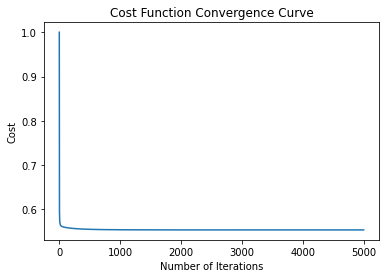

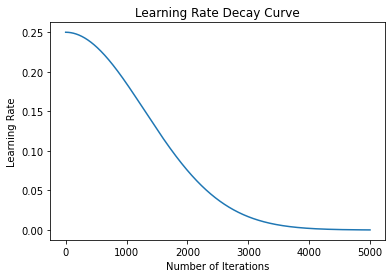

In [169]:
lgr = LogisticRegression(0.25, 0, 5000, 0.2, 0, 6e-7)
lgr.split_dataset(df_to_use, 'Churn')
lgr.fit(False)

## Adaboost with Churn data

In [555]:
df = pd.read_csv('./data/cust_churn.csv')
df = preprocess_churn_data(df, 'Churn')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994971,-1,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173876,-1,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.960399,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.514251,0,0,-0.746535,-0.195400,-1,...,0,1,0,0,0,1,1,0,0,0
4,0,0,0,0,-1.236724,1,1,0.197365,-0.941193,1,...,1,0,0,1,0,0,0,0,1,0


In [556]:
adaboost_classifier = Adaboost(20, 0.2)
adaboost_classifier.split_dataset(df, 'Churn')

In [557]:
adaboost_classifier.fit(1000, 0.5, 0.01, 5e-6)

Boosting Round:  0
Boosting Round:  1
Boosting Round:  2
Boosting Round:  3
Boosting Round:  4
Boosting Round:  5
Boosting Round:  6
Boosting Round:  7
Boosting Round:  8
Boosting Round:  9
Boosting Round:  10
Boosting Round:  11
Boosting Round:  12
Boosting Round:  13
Boosting Round:  14
Boosting Round:  15
Boosting Round:  16
Boosting Round:  17
Boosting Round:  18
Boosting Round:  19
(5634, 20)
831
3696
408
699
TP: 831
TN: 3696
FP: 408
FN: 699
Accuracy: 0.8035143769968051
Recall: 0.5431372549019607
Specificity: 0.9005847953216374
Precision: 0.6707021791767555
False Discovery Rate: 0.32929782082324455
F1 score: 0.600216684723727


In [558]:
adaboost_classifier.predict()

(1409, 20)
193
949
121
146
TP: 193
TN: 949
FP: 121
FN: 146
Accuracy: 0.8105039034776437
Recall: 0.5693215339233039
Specificity: 0.8869158878504673
Precision: 0.6146496815286624
False Discovery Rate: 0.3853503184713376
F1 score: 0.5911179173047473


In [559]:
lgr = LogisticRegression(0.05, 1000, 0.2, 0, 5e-6)
lgr.split_dataset(df, 'Churn')
lgr.fit(is_constant_lr=True, no_curve=True, calculate_metric_on_train=True)

849
3679
425
681
TP: 849
TN: 3679
FP: 425
FN: 681
Accuracy: 0.8036918707845225
Recall: 0.5549019607843138
Specificity: 0.8964424951267057
Precision: 0.6664050235478807
False Discovery Rate: 0.33359497645211933
F1 score: 0.6055634807417974


In [560]:
lgr.generate_metric()

195
948
122
144
TP: 195
TN: 948
FP: 122
FN: 144
Accuracy: 0.8112136266855926
Recall: 0.5752212389380531
Specificity: 0.8859813084112149
Precision: 0.6151419558359621
False Discovery Rate: 0.38485804416403785
F1 score: 0.5945121951219512


## Adaboost with adult dataset

In [540]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
           'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train_df = pd.read_csv('./data/adult-dataset/adult.data', names=columns, header=None, sep=", ", engine='python')
test_df = pd.read_csv('./data/adult-dataset/adult.test', names=columns, header=None, sep=", ", engine='python')

In [541]:
adult_train = preprocess_adult_data(train_df, 'income', False, False)
adult_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
{'age': -1, 'workclass': 0, 'fnlwgt': -1, 'education': 0, 'education-num': -1, 'marital-

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,relationship_Husband,relationship_Not-in-family,...,occupation_Tech-support,occupation_Transport-moving,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0.030671,-1.063611,1.134739,1,2174,-0.21666,-0.035429,-1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.837109,-1.008707,1.134739,1,0,-0.21666,-2.222153,-1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,1,0,-0.21666,-0.035429,-1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1.057047,0.425801,-1.197459,1,0,-0.21666,-0.035429,-1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.775768,1.408176,1.134739,0,0,-0.21666,-0.035429,-1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [543]:
adult_test = preprocess_adult_data(test_df, 'income', True, False)
adult_test['income'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16280 non-null  int8   
 1   workclass       16280 non-null  object 
 2   fnlwgt          16280 non-null  float64
 3   education       16280 non-null  object 
 4   education-num   16280 non-null  float64
 5   marital-status  16280 non-null  object 
 6   occupation      16280 non-null  object 
 7   relationship    16280 non-null  object 
 8   race            16280 non-null  object 
 9   sex             16280 non-null  object 
 10  capital-gain    16280 non-null  float64
 11  capital-loss    16280 non-null  float64
 12  hours-per-week  16280 non-null  float64
 13  income          16280 non-null  int64  
dtypes: float64(5), int64(1), int8(1), object(7)
memory usage: 1.6+ MB
None
{'age': -1, 'workclass': 0, 'fnlwgt': -1, 'education': 0, 'education-num': -1, 'marital-status'

KeyError: "['native-country'] not found in axis"

In [297]:
lgr = LogisticRegression(0.05, 1000, 0.2, 0, 6e-6)
lgr.split_given_train_test_df(adult_train, adult_test, 'income')
lgr.fit(is_constant_lr=True, no_curve=True, calculate_metric_on_train=True)

Accuracy: 0.8314548078990203
Recall: 0.6114016069378906
Specificity: 0.9012540453074434
Precision: 0.6626123013130615
False Discovery Rate: 0.3373876986869385
F1 score: 0.6359777129211993


In [298]:
lgr.generate_metric()

Accuracy: 0.8327498310914563
Recall: 0.6073842953718148
Specificity: 0.9024527543224768
Precision: 0.6582135812905043
False Discovery Rate: 0.3417864187094956
F1 score: 0.6317782285327924


In [303]:
adaboost_classifier = Adaboost(10, 0.2)
adaboost_classifier.split_dataset_given_tran_test(adult_train, adult_test, 'income')

In [304]:
adaboost_classifier.fit(1000, 0.5, 0.01, 5e-6)

(32561, 10)
Accuracy: 0.8285064955007524
Recall: 0.5978829230965438
Specificity: 0.9016585760517799
Precision: 0.6585194549796319
False Discovery Rate: 0.341480545020368
F1 score: 0.6267379679144385


In [305]:
adaboost_classifier.predict()

(16282, 10)
Accuracy: 0.8285731834653891
Recall: 0.592823712948518
Specificity: 0.9014877362283876
Precision: 0.6504992867332382
False Discovery Rate: 0.34950071326676174
F1 score: 0.6203237654740852


## Adaboost with Credit Card dataset

In [562]:
df = pd.read_csv('./data/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [563]:
df = preprocess_credit_card(df, 'Class',  binning=False, fract_neg_class=10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [471]:
lgr = LogisticRegression(0.05, 1000, 0.2, 0, 6e-6)
lgr.split_dataset(df, 'Class')
lgr.fit(is_constant_lr=True, no_curve=True, calculate_metric_on_train=True)

311
15883
132
67
TP: 311
TN: 15883
FP: 132
FN: 67
Accuracy: 0.9878606722381504
Recall: 0.8227513227513228
Specificity: 0.9917577271308149
Precision: 0.7020316027088036
False Discovery Rate: 0.2979683972911964
F1 score: 0.7576126674786845


In [472]:
lgr.generate_metric()

93
3935
50
21
TP: 93
TN: 3935
FP: 50
FN: 21
Accuracy: 0.9826787021224689
Recall: 0.8157894736842105
Specificity: 0.9874529485570891
Precision: 0.6503496503496503
False Discovery Rate: 0.34965034965034963
F1 score: 0.7237354085603113


In [473]:
adaboost_classifier = Adaboost(20, 0.2)
adaboost_classifier.split_dataset(df, label='Class')
adaboost_classifier.fit(1000, 0.5, 0.01, 5e-6)

Boosting Round:  0
Boosting Round:  1
Boosting Round:  2
Boosting Round:  3
Boosting Round:  4
Boosting Round:  5
Boosting Round:  6
Boosting Round:  7
Boosting Round:  8
Boosting Round:  9
Boosting Round:  10
Boosting Round:  11
Boosting Round:  12
Boosting Round:  13
Boosting Round:  14
Boosting Round:  15
Boosting Round:  16
Boosting Round:  17
Boosting Round:  18
Boosting Round:  19
(16393, 20)
315
12825
3190
63
TP: 315
TN: 12825
FP: 3190
FN: 63
Accuracy: 0.8015616421643385
Recall: 0.8333333333333334
Specificity: 0.8008117389946925
Precision: 0.0898716119828816
False Discovery Rate: 0.9101283880171184
F1 score: 0.16224568632500644


In [474]:
adaboost_classifier.predict()

(4099, 20)
93
3231
754
21
TP: 93
TN: 3231
FP: 754
FN: 21
Accuracy: 0.8109294949987802
Recall: 0.8157894736842105
Specificity: 0.8107904642409034
Precision: 0.10979929161747344
False Discovery Rate: 0.8902007083825265
F1 score: 0.1935483870967742
